# Linear Regression Project
## Rock Climbing Route Rating Predictor

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import (LinearRegression, 
Ridge, RidgeCV, Lasso, LassoCV)

from sklearn.model_selection import (train_test_split, 
cross_val_score, KFold, cross_val_score)

from sklearn.metrics import mean_absolute_error

from sklearn.preprocessing import (StandardScaler, 
                                   PolynomialFeatures)

%matplotlib inline

In [2]:
# Read in pickled df
df = pd.read_pickle("mtn_project_df.pkl 9.08.08 PM")

In [3]:
df.head()

,name,location,park,wall,grade_score,style,route_length,num_pitches,num_ratings,rating,share_date,month_views,photos,comments,desc_len,loc_len,prot_len,num_ticks
0,Supercrack (aka Crack Attack),"[All Locations, Kentucky, Red River Gorge, Nor...",Northern Gorge,Indian Creek,9.0,trad,5.0,1,150.0,3.8,2009.0,150.0,12,21.0,344.0,139.0,159.0,300
1,Roadside Attraction,"[All Locations, Kentucky, Red River Gorge, Nat...",Natural Bridge…,Graining Fork Nature…,7.0,trad,20.0,2,406.0,3.7,2006.0,221.0,30,26.0,425.0,163.0,402.0,917
2,Diamond in the Crack,"[All Locations, Kentucky, Red River Gorge, Nor...",Northern Gorge,Jewel Pinnacle,6.0,trad,20.0,2,97.0,3.8,2006.0,56.0,15,14.0,1092.0,0.0,0.0,224
3,Autumn,"[All Locations, Kentucky, Red River Gorge, Nor...",Northern Gorge,Long Wall,9.0,trad,20.0,1,455.0,3.7,2006.0,102.0,13,16.0,476.0,387.0,69.0,979
4,27 Years of Climbing,"[All Locations, Kentucky, Red River Gorge, Pen...",Pendergrass-Mur…,Gallery,8.0,sport,20.0,1,1074.0,3.5,2008.0,210.0,13,20.0,75.0,19.0,19.0,3487


## Exploratory Data Analysis

In [4]:
# Reset index to the name of the route
df = df.set_index('name')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2258 entries, Supercrack (aka Crack Attack) to Zoology
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   location      2258 non-null   object 
 1   park          2258 non-null   object 
 2   wall          2258 non-null   object 
 3   grade_score   2258 non-null   float64
 4   style         2258 non-null   object 
 5   route_length  2258 non-null   float64
 6   num_pitches   2258 non-null   int64  
 7   num_ratings   2258 non-null   float64
 8   rating        2258 non-null   float64
 9   share_date    2258 non-null   float64
 10  month_views   2258 non-null   float64
 11  photos        2258 non-null   int64  
 12  comments      2258 non-null   float64
 13  desc_len      2258 non-null   float64
 14  loc_len       2258 non-null   float64
 15  prot_len      2258 non-null   float64
 16  num_ticks     2258 non-null   int64  
dtypes: float64(10), int64(3), object(4)
memory us

In [6]:
# Remove duplicate rows
df = df[~df.index.duplicated()]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2188 entries, Supercrack (aka Crack Attack) to Zoology
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   location      2188 non-null   object 
 1   park          2188 non-null   object 
 2   wall          2188 non-null   object 
 3   grade_score   2188 non-null   float64
 4   style         2188 non-null   object 
 5   route_length  2188 non-null   float64
 6   num_pitches   2188 non-null   int64  
 7   num_ratings   2188 non-null   float64
 8   rating        2188 non-null   float64
 9   share_date    2188 non-null   float64
 10  month_views   2188 non-null   float64
 11  photos        2188 non-null   int64  
 12  comments      2188 non-null   float64
 13  desc_len      2188 non-null   float64
 14  loc_len       2188 non-null   float64
 15  prot_len      2188 non-null   float64
 16  num_ticks     2188 non-null   int64  
dtypes: float64(10), int64(3), object(4)
memory us

In [8]:
df.describe()

,grade_score,route_length,num_pitches,num_ratings,rating,share_date,month_views,photos,comments,desc_len,loc_len,prot_len,num_ticks
count,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000
mean,12.832267,61.315814,1.032907,31.749086,2.555484,2014.507770,17.354205,1.296618,1.278793,241.663163,103.872486,38.696527,93.043876
std,5.059565,22.819832,0.223894,68.609660,0.723018,4.695719,16.226203,2.181572,2.344178,207.570629,100.842422,54.909055,233.784840
min,0.000000,5.000000,1.000000,1.000000,0.700000,2006.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,9.000000,45.000000,1.000000,2.000000,2.000000,2011.000000,10.000000,0.000000,0.000000,100.000000,41.000000,13.000000,3.000000
50%,12.000000,60.000000,1.000000,8.000000,2.500000,2015.000000,14.000000,1.000000,0.000000,182.000000,78.000000,20.000000,16.000000
75%,17.000000,70.000000,1.000000,29.000000,3.000000,2019.000000,20.000000,2.000000,2.000000,317.250000,132.000000,38.000000,69.000000
max,29.000000,240.000000,5.000000,1074.000000,4.000000,2022.000000,295.000000,30.000000,26.000000,1716.000000,1459.000000,685.000000,3487.000000


#### Remove Problematic Row
There should not be a zero for the grade_score, so that row needs to be removed.

In [9]:
# Locate the problematic route
df[df['grade_score']==0]

,location,park,wall,grade_score,style,route_length,num_pitches,num_ratings,rating,share_date,month_views,photos,comments,desc_len,loc_len,prot_len,num_ticks
name,,,,,,,,,,,,,,,,,
Cat's Crawl,"[All Locations, Kentucky, Western Kentucky, Pi...",Western Kentucky,Pilot Rock,0.0,trad,45.0,1,2.0,2.5,2006.0,4.0,0,0.0,116.0,96.0,23.0,1


In [10]:
# Drop the row
df = df.drop("Cat's Crawl")

In [11]:
df.describe()

,grade_score,route_length,num_pitches,num_ratings,rating,share_date,month_views,photos,comments,desc_len,loc_len,prot_len,num_ticks
count,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000
mean,12.838134,61.323274,1.032922,31.762689,2.555510,2014.511660,17.360311,1.297211,1.279378,241.720622,103.876086,38.703704,93.085963
std,5.053271,22.822382,0.223944,68.622400,0.723182,4.693265,16.227399,2.181895,2.344554,207.600695,100.865344,54.920586,233.830016
min,1.000000,5.000000,1.000000,1.000000,0.700000,2006.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,9.000000,45.000000,1.000000,2.000000,2.000000,2011.000000,10.000000,0.000000,0.000000,100.000000,41.000000,13.000000,3.000000
50%,12.000000,60.000000,1.000000,8.000000,2.500000,2015.000000,14.000000,1.000000,0.000000,182.000000,78.000000,20.000000,16.000000
75%,17.000000,70.000000,1.000000,29.000000,3.000000,2019.000000,20.000000,2.000000,2.000000,317.500000,132.000000,38.000000,69.000000
max,29.000000,240.000000,5.000000,1074.000000,4.000000,2022.000000,295.000000,30.000000,26.000000,1716.000000,1459.000000,685.000000,3487.000000


### Density - Histogram Plot
The density follows a mostly normal distribution. 

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


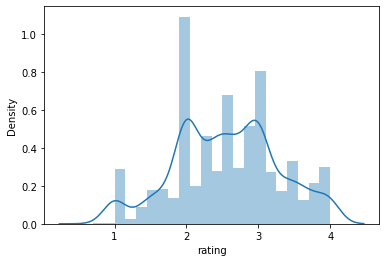

In [12]:
sns.distplot(df['rating']);

### Correlation
Looking at the heatmap, we can see strong correlation between the following:
<ul>
    <li>num_ratings & num_ticks (0.98)</li>
    <li>grade_score & route_length (0.79)</li>
    <li>photos & comments (0.67)</li>
    <li>num_ratings & comments (0.66)</li>
    <li>num_ratings & photos (0.60)</li>
    <li>comments & num_ticks (0.60)</li>
</ul>

#### Difficulty vs. Route Length
The difficulty rating will increase as the length of the route increases. An interaction term could prove to be useful in the model.
#### Popularity Metrics
These metrics are all highly correlated and is to be expected. Combining these features into a single popularity metric could prove to be useful in the model. 

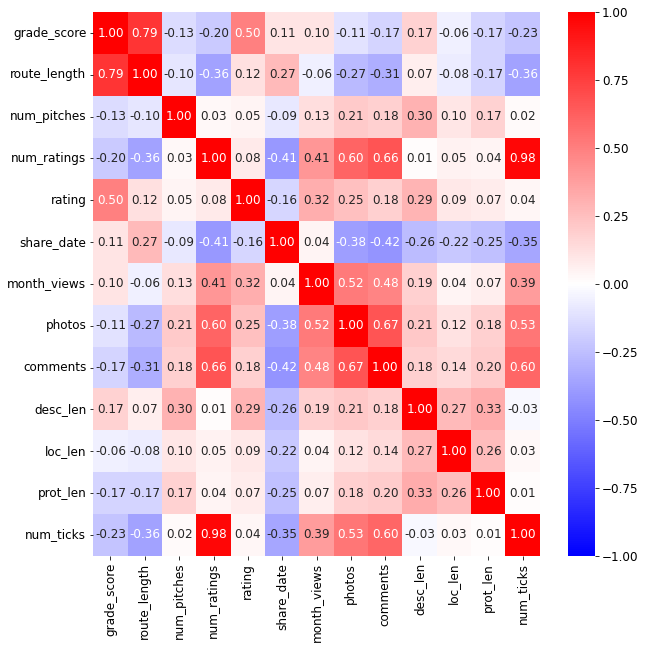

In [13]:
#Correlation heatmap
plt.rcParams['font.size'] = 12
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap='bwr', annot=True, vmin=-1, vmax=1,
            fmt='.2f');

In [14]:
# Look at the correlations above 0.5
c = df.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False)
print(so[13:30])

num_ticks     num_ratings     0.975353
num_ratings   num_ticks       0.975353
route_length  grade_score     0.789720
grade_score   route_length    0.789720
comments      photos          0.665622
photos        comments        0.665622
num_ratings   comments        0.664876
comments      num_ratings     0.664876
num_ratings   photos          0.604890
photos        num_ratings     0.604890
num_ticks     comments        0.600214
comments      num_ticks       0.600214
num_ticks     photos          0.534630
photos        num_ticks       0.534630
month_views   photos          0.521131
photos        month_views     0.521131
rating        grade_score     0.495425
dtype: float64


### Make new variable combining popularity metrics
Add the number of ratings, number of ticks, number of photos, and number of comments.

In [15]:
df['popularity'] = (df['num_ticks'] + df['num_ratings'] + 
                    df['comments'] + df['photos'])

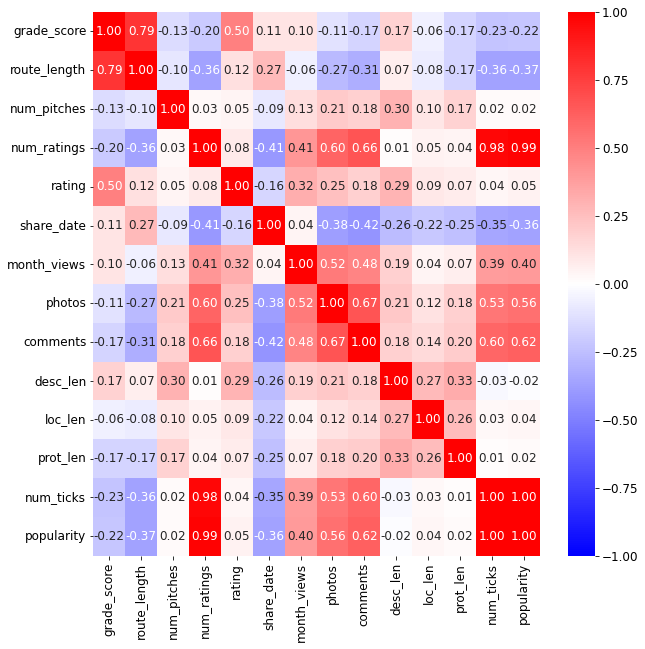

In [16]:
#Correlation heatmap
plt.rcParams['font.size'] = 12
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap='bwr', annot=True, vmin=-1, vmax=1,
            fmt='.2f');

### Pairplots
Several variables could perform better with a log transformation.

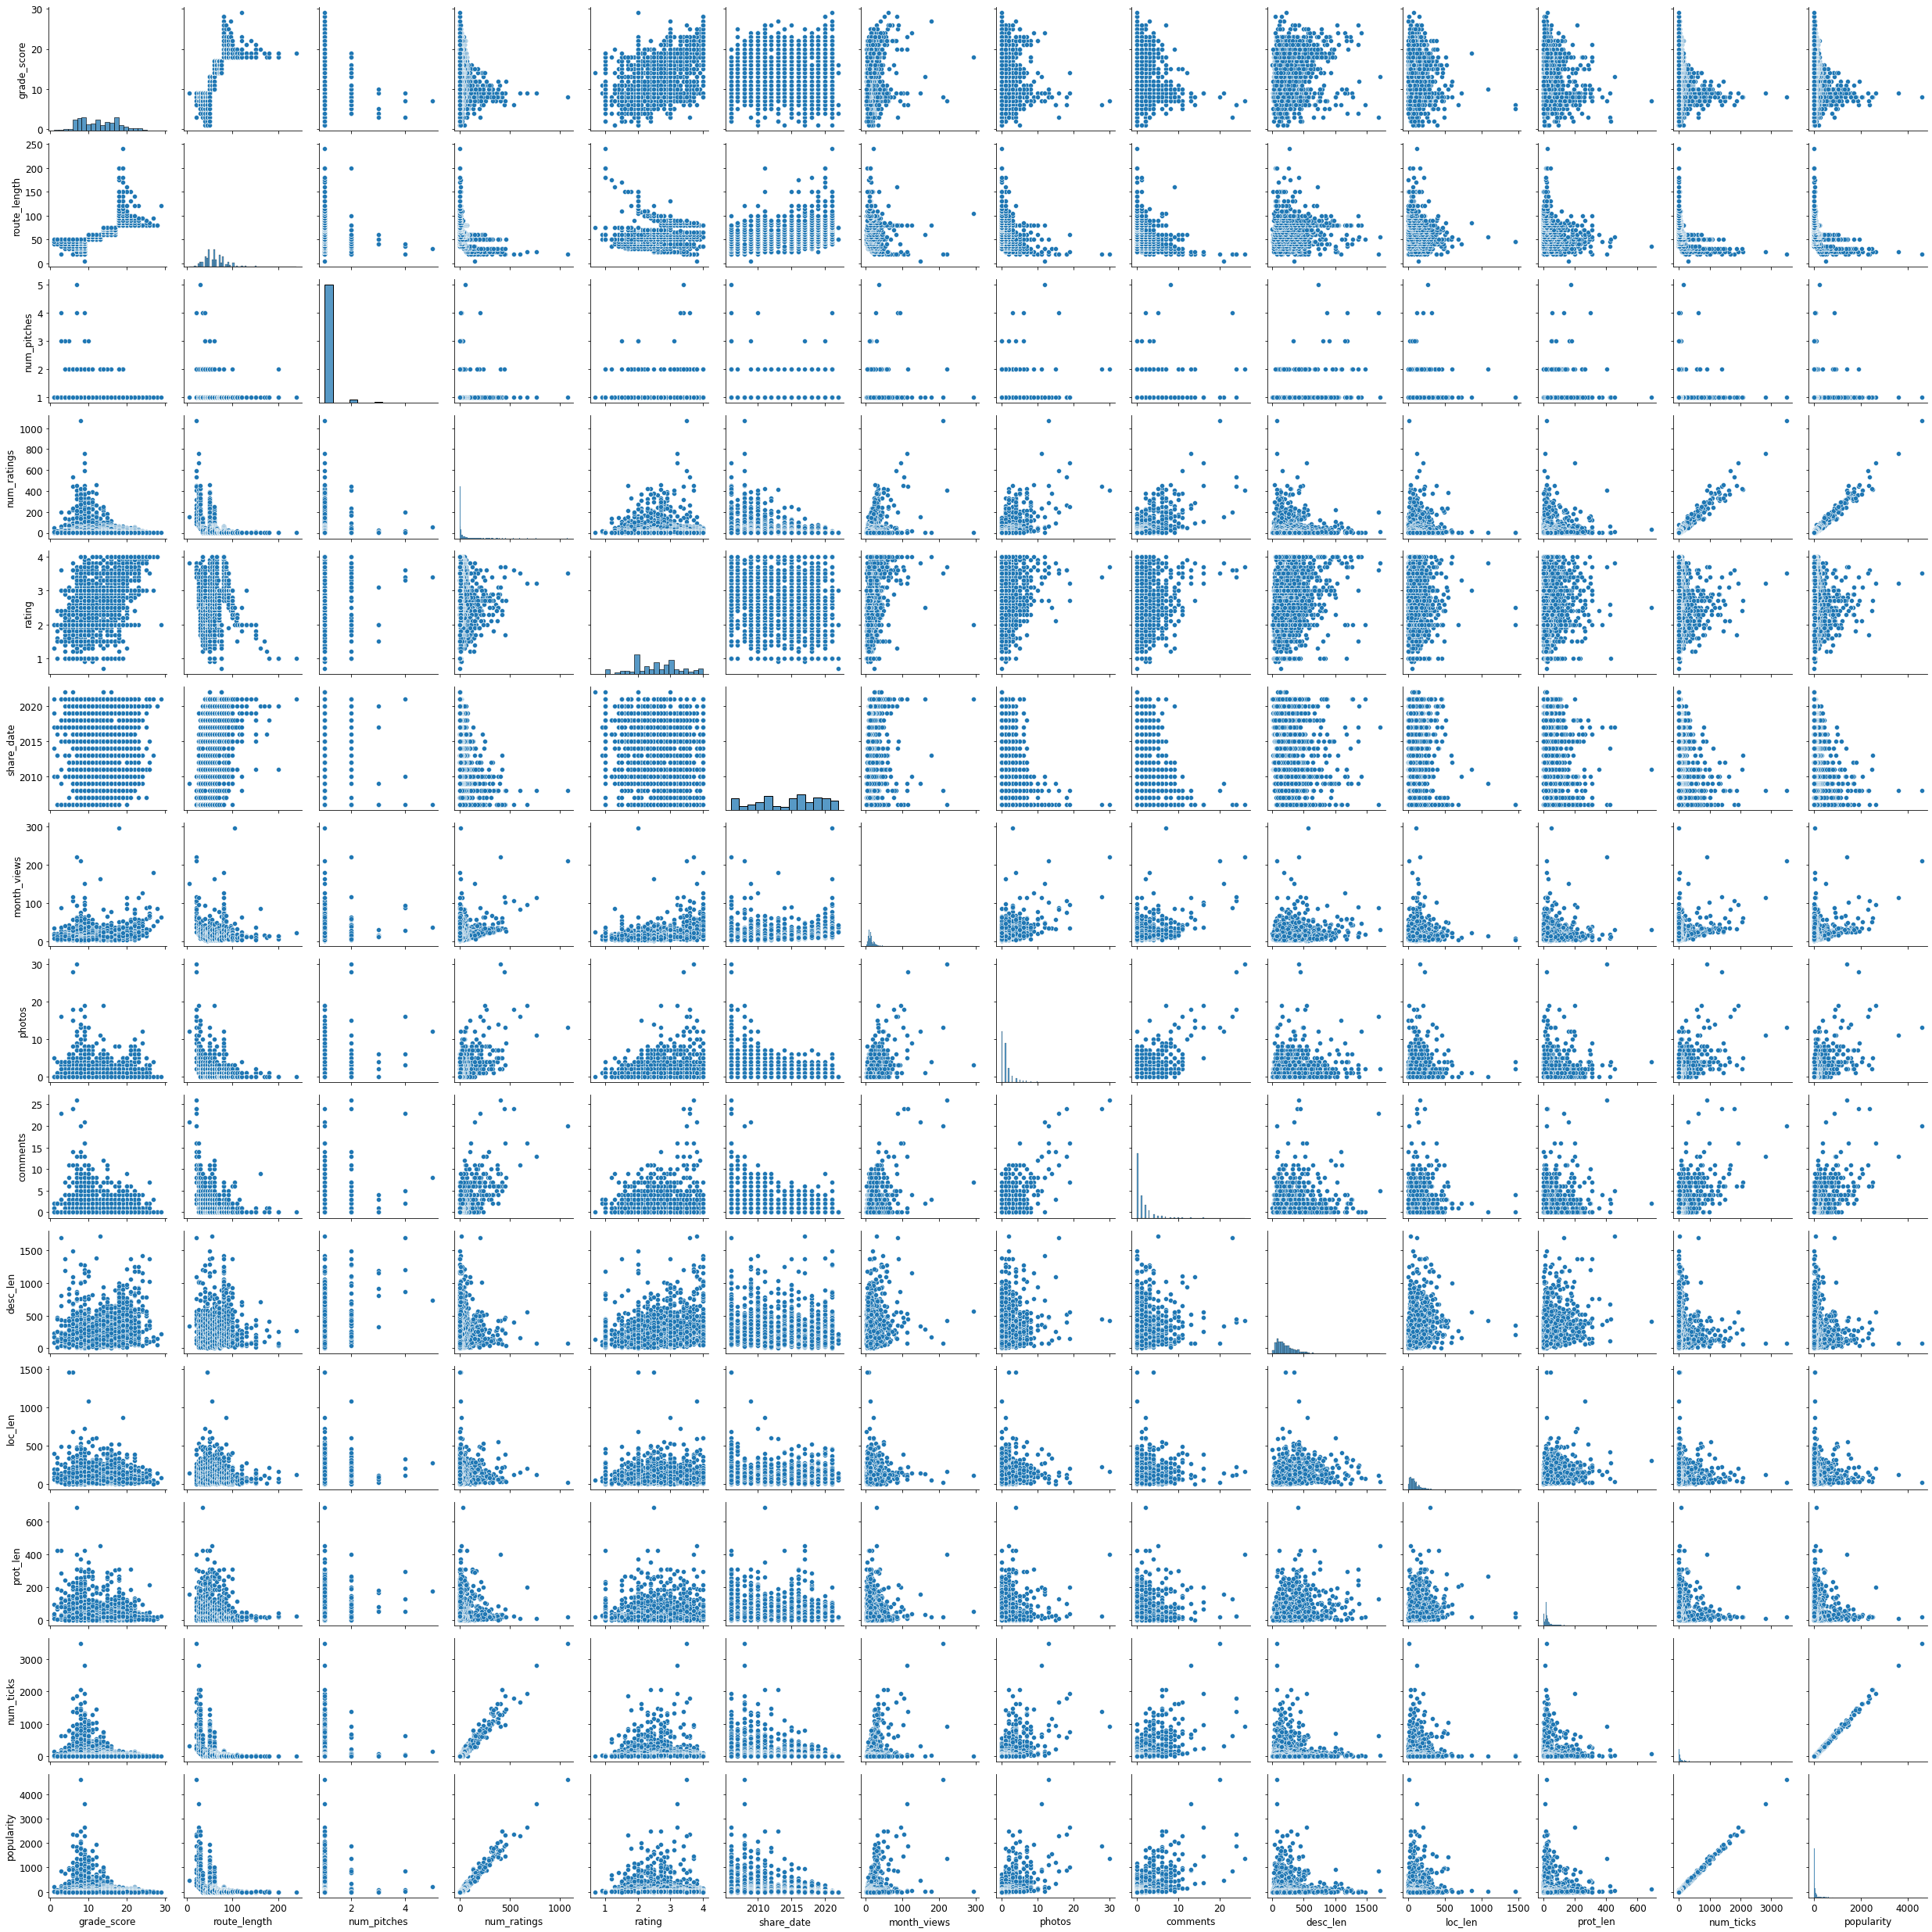

In [17]:
sns.pairplot(data=df);

### Log Transformations

##### Monthly Views

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


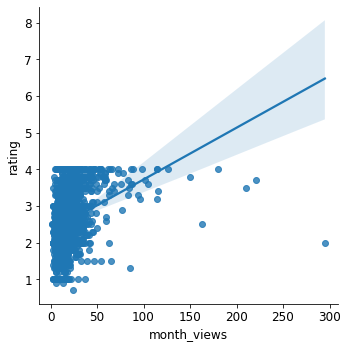

In [18]:
sns.lmplot('month_views', 'rating', data=df);

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


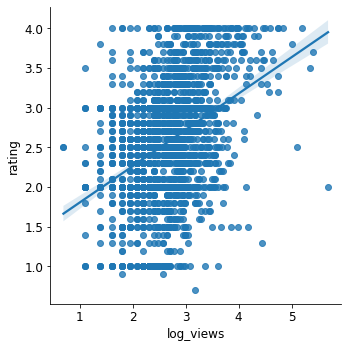

In [19]:
df['log_views'] = np.log(df['month_views'])
sns.lmplot('log_views', 'rating', data=df);

##### Description Length

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


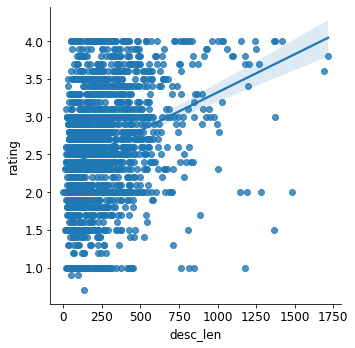

In [20]:
sns.lmplot('desc_len', 'rating', data=df);

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


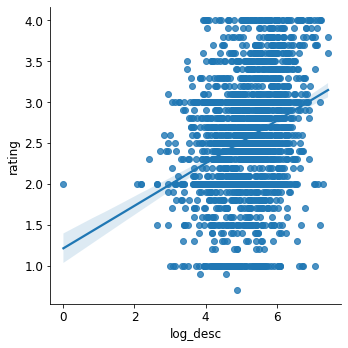

In [21]:
df['log_desc'] = np.log(df['desc_len'])
sns.lmplot('log_desc', 'rating', data=df);

##### Location Length

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


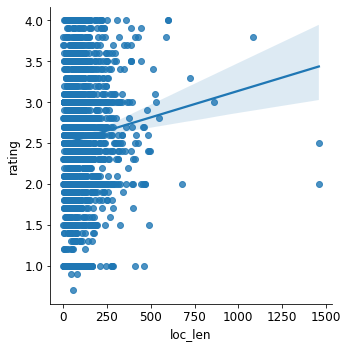

In [22]:
sns.lmplot('loc_len', 'rating', data=df);

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/function_base.py:161: RuntimeWarning: invalid value encountered in add
  y += start
/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


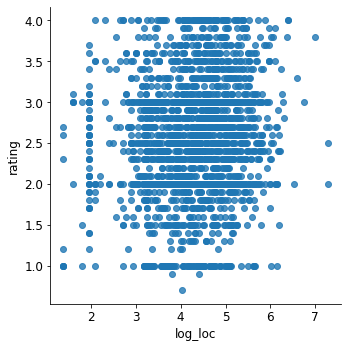

In [23]:
df['log_loc'] = np.log(df['loc_len'])
sns.lmplot('log_loc', 'rating', data=df);

##### Protection Length

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


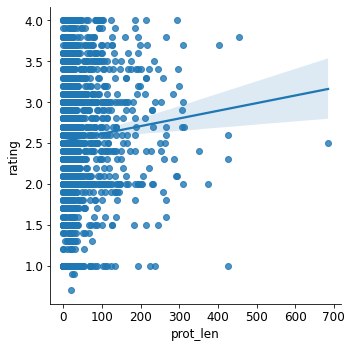

In [24]:
sns.lmplot('prot_len', 'rating', data=df);

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/function_base.py:161: RuntimeWarning: invalid value encountered in add
  y += start
/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


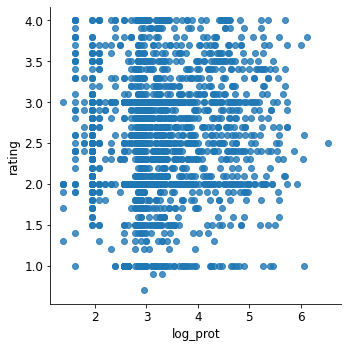

In [25]:
df['log_prot'] = np.log(df['prot_len'])
sns.lmplot('log_prot', 'rating', data=df);

In [26]:
# Drop the original variables from the df
df.drop(['prot_len', 'loc_len', 'desc_len', 'month_views'], 
        axis=1, inplace=True)

### Variable Transformations
##### Share Date --> Route Age
The model will be more interpretable by converting the share date to the numbe of year the route has been on the app.

In [27]:
# change share_date to route age on app in years
df['rt_age'] = 2022 - df['share_date']

# drop the share_date column 
df = df.drop(['share_date'], axis=1)

##### Number of Routes on Same Wall
With so many values in the wall column, it makes more sense to change the variable to the total number of routes on the same wall. This allows us to see if an area highly populated with routes receives better ratings.

In [28]:
# Get the number of routes listed on same wall
w = df['wall'].value_counts()
w1 = w.to_dict()
df['routes_on_wall'] = df['wall'].map(w1)

#### Remove Nulls/Infinites
After taking the log of some variables, infinte values were created, so those must be removed.

In [29]:
# There are some infinite values and nulls, remove them
# Remove infinite values
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1978 entries, Supercrack (aka Crack Attack) to Zoology
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        1978 non-null   object 
 1   park            1978 non-null   object 
 2   wall            1978 non-null   object 
 3   grade_score     1978 non-null   float64
 4   style           1978 non-null   object 
 5   route_length    1978 non-null   float64
 6   num_pitches     1978 non-null   int64  
 7   num_ratings     1978 non-null   float64
 8   rating          1978 non-null   float64
 9   photos          1978 non-null   int64  
 10  comments        1978 non-null   float64
 11  num_ticks       1978 non-null   int64  
 12  popularity      1978 non-null   float64
 13  log_views       1978 non-null   float64
 14  log_desc        1978 non-null   float64
 15  log_loc         1978 non-null   float64
 16  log_prot        1978 non-null   float64
 17  rt_age 

### Possible Interaction Terms
##### Difficulty Rating X Route Length

In [31]:
df['gradeXlength'] = df['grade_score'] * df['route_length']

##### Number of Ticks X Route Age

In [32]:
df['ticks_age'] = df['num_ticks'] / (df['rt_age'] + 1)

### Categorical Variables
Style & Park need to be transformed into dummy variables. The rest of the location information is not needed for the model.

#### Style of Rock Climbing
The following three categories will be encoded with one column dropped.
<ol>
    <li>Trad</li>
    <li>Sport</li>
    <li>Top Rope (TR)</li>
</ol>

In [33]:
# Get the number of entries for each category
df['style'].value_counts()

sport    1389
trad      579
tr         10
Name: style, dtype: int64

In [34]:
# Use the pandas get_dummies method 
style = pd.get_dummies(df['style'], drop_first=True)
style

,tr,trad
name,,
Supercrack (aka Crack Attack),0,1
Roadside Attraction,0,1
Autumn,0,1
27 Years of Climbing,0,0
Arachnid,0,1
...,...,...
Double Stuff,0,0
Pimpto-Bismol,0,0
Hookah,0,0


#### Parks 
Get dummy variables for the different parks where the routes are located. To limit the number of dummy variables, an "other" category was created for parks with less than 30 routes within the park.

In [35]:
# Get list of all the values and their counts
df['park'].value_counts()

Northern Gorge      412
Pendergrass-Mur…    381
Miller Fork Rec…    354
Muir Valley         313
Bald Rock Fork…     130
Natural Bridge…     119
Cathedral Domai…     82
Motherlode           55
Zoo                  37
Hole in the Wall     32
White Pine Trail     14
Muscle Beach         13
Hunter Bluff          7
Buzzards Roost        6
Southern Region…      6
Inner Loop Trail      4
Kentucky              4
Western Kentucky      3
Rockcastle River      3
See Rocks             2
Graffiti Cave         1
Name: park, dtype: int64

In [36]:
# Put parks with less than 30 entries in other category
park_count = df['park'].value_counts()
other_parks = list(park_count[park_count<30].index)
df['park'] = df['park'].replace(other_parks, 'other')

In [37]:
# Use the pandas get_dummies method
park = pd.get_dummies(df['park'], drop_first=True)
park

,Cathedral Domai…,Hole in the Wall,Miller Fork Rec…,Motherlode,Muir Valley,Natural Bridge…,Northern Gorge,Pendergrass-Mur…,Zoo,other
name,,,,,,,,,,
Supercrack (aka Crack Attack),0,0,0,0,0,0,1,0,0,0
Roadside Attraction,0,0,0,0,0,1,0,0,0,0
Autumn,0,0,0,0,0,0,1,0,0,0
27 Years of Climbing,0,0,0,0,0,0,0,1,0,0
Arachnid,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
Double Stuff,0,0,0,0,1,0,0,0,0,0
Pimpto-Bismol,0,0,0,0,0,0,0,1,0,0
Hookah,0,0,0,0,0,0,0,0,0,0


### Combine dummy variable dataframes with df
Combine the dummy variable dataframes with the original dataframe. Drop the original variable columns.

In [38]:
df = pd.concat([df, park, style], axis=1)
df.drop(['park', 'style', 'wall', 'location'], 
        axis=1, inplace=True)
df

,grade_score,route_length,num_pitches,num_ratings,rating,photos,comments,num_ticks,popularity,log_views,...,Miller Fork Rec…,Motherlode,Muir Valley,Natural Bridge…,Northern Gorge,Pendergrass-Mur…,Zoo,other,tr,trad
name,,,,,,,,,,,,,,,,,,,,,
Supercrack (aka Crack Attack),9.0,5.0,1,150.0,3.8,12,21.0,300,483.0,5.010635,...,0,0,0,0,1,0,0,0,0,1
Roadside Attraction,7.0,20.0,2,406.0,3.7,30,26.0,917,1379.0,5.398163,...,0,0,0,1,0,0,0,0,0,1
Autumn,9.0,20.0,1,455.0,3.7,13,16.0,979,1463.0,4.624973,...,0,0,0,0,1,0,0,0,0,1
27 Years of Climbing,8.0,20.0,1,1074.0,3.5,13,20.0,3487,4594.0,5.347108,...,0,0,0,0,0,1,0,0,0,0
Arachnid,8.0,20.0,1,127.0,3.7,9,7.0,262,405.0,3.663562,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Double Stuff,18.0,200.0,2,2.0,1.0,0,0.0,2,4.0,1.609438,...,0,0,1,0,0,0,0,0,0,0
Pimpto-Bismol,19.0,200.0,1,1.0,1.0,0,0.0,1,2.0,2.639057,...,0,0,0,0,0,1,0,0,0,0
Hookah,18.0,200.0,1,1.0,1.0,0,0.0,3,4.0,2.639057,...,0,0,0,0,0,0,0,0,0,0


### Assign Variables

In [39]:
# Assign the variables to the target/features
X_fullset = df.drop(['rating'], axis=1)
y_fullset = df['rating']

### Split Data (Train/Validate/Test)
Split the data into 60/20/20

In [40]:
# Split off the test data
X, X_test, y, y_test = train_test_split(X_fullset,y_fullset,
                                        test_size=.2,
                                        random_state=21)
X_tr, X_val, y_tr, y_val = train_test_split(X, y,
                                            test_size=.25,
                                            random_state=21)

In [41]:
X_tr.shape

(1186, 28)

In [42]:
y_tr.shape

(1186,)

In [43]:
X_val.shape

(396, 28)

In [44]:
y_val.shape

(396,)

In [45]:
X_test.shape

(396, 28)

In [46]:
y_test.shape

(396,)

### Baseline Model
#### Create Reusable Functions

In [47]:
# Mean Absolute Error 
def mae(y_true, y_pred):
    return np.mean(abs(y_pred - y_true))

In [48]:
# Basic Linear Regression
def lin_reg(X_tr, X_val, y_tr, y_val):
    lr = LinearRegression()
    lr.fit(X_tr, y_tr)
    tr_score = lr.score(X_tr, y_tr)
    val_score = lr.score(X_val, y_val)
    lr_predict = lr.predict(X_val)
    lr_mae = mae(y_val, lr_predict)
    
    print('Train Score:', tr_score)
    print('Validation Score:', val_score)
    print(f'MAE: {lr_mae}')

### Baseline Linear Regression 
##### Without Popularity Column

In [49]:
lin_reg(X_tr.drop(['popularity'], axis=1), 
        X_val.drop(['popularity'], axis=1), 
        y_tr, y_val)

Train Score: 0.59960008778226
Validation Score: 0.6112941417914866
MAE: 0.3376910523151454


##### With Popularity Column

In [50]:
lin_reg(X_tr.drop(['num_ticks', 'num_ratings',
                   'comments', 'photos'], axis=1), 
        X_val.drop(['num_ticks', 'num_ratings',
                   'comments', 'photos'], axis=1), 
        y_tr, y_val)

Train Score: 0.5984855646324578
Validation Score: 0.6115446966958478
MAE: 0.3373942900909697


##### Decide on Popularity Metric
The models' performance was nearly identical. The popularity model reduced multicollinearity, simplified the model, and slightly reduced MAE. I decided to go with the popularity metric. 

In [51]:
X_tr.drop(['num_ticks', 'num_ratings','comments', 'photos'],
           axis=1, inplace=True) 
X_val.drop(['num_ticks', 'num_ratings','comments', 'photos'], 
            axis=1, inplace=True)
X_test.drop(['num_ticks', 'num_ratings','comments', 'photos'], 
             axis=1, inplace=True)

Since we dropped the num_ticks column, we need to change the interaction term to popularity/route_age

In [52]:
X_tr['pop_age'] = X_tr['popularity'] / (X_tr['rt_age'] + 1)

In [53]:
X_val['pop_age'] = X_val['popularity'] / (X_val['rt_age'] + 1)

In [54]:
X_test['pop_age'] = X_test['popularity'] / (X_test['rt_age'] + 1)

In [55]:
# Drop the ticks_age column
X_tr.drop(['ticks_age'], axis=1, inplace=True)
X_val.drop(['ticks_age'], axis=1, inplace=True)
X_test.drop(['ticks_age'], axis=1, inplace=True)

### Polynomial Regression 
A polynomial regression increased MAE, will disregard.

In [56]:
def create_poly_reg(degree):
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X_tr)
    poly = LinearRegression()
    print(np.mean(abs(cross_val_score(poly, X_poly, y_tr,
                                   cv=5, 
                                   scoring='neg_mean_absolute_error'))))

poly_cv = []
for i in range(1,4):
    poly_cv.append(create_poly_reg(i))

0.37012100483206706
0.41349946690325534
164.29763921837798


### Scale Data

In [57]:
# Fit scaling to X_train
std = StandardScaler()
std.fit(X_tr.values)

StandardScaler()

In [58]:
# Apply scaling to X_train & X_test
X_tr_sc = std.transform(X_tr.values)
X_val_sc = std.transform(X_val.values)
X_te_sc = std.transform(X_test.values)

In [59]:
lin_reg(X_tr_sc, X_val_sc, y_tr, y_val)

Train Score: 0.5989089342128366
Validation Score: 0.6126590224301729
MAE: 0.33672846681193125


### Simple Linear Regression Model w/ Cross Validation

In [60]:
lm = LinearRegression()
scoring = 'neg_mean_absolute_error'
lm_mae = cross_val_score(lm, X_tr_sc, y_tr, cv=5, scoring=scoring)
lm_mae

array([-0.3622889 , -0.36981424, -0.36583969, -0.37962405, -0.37303814])

In [61]:
print(f'Simple Regression MAE mean: {np.mean(abs(lm_mae)):.3f}')

Simple Regression MAE mean: 0.370


### Ridge Regression Model

In [62]:
alphas = 10**np.linspace(-2,2,200)

ridge_model = RidgeCV(alphas=alphas, cv=5)
ridge_model.fit(X_tr_sc, y_tr)

RidgeCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       3.44896226e+01, 3.61234270e+01, 3.78346262e+01, 3.96268864e+01,
       4.15040476e+01, 4.34701316e+01, 4.55293507e+01, 4.76861170e+01,
       4.99450512e+01, 5.23109931e+01, 5.47890118e+01, 5.73844165e+01,
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        cv=5)

In [63]:
ridge_model.alpha_

5.941133984965034

In [64]:
list(zip(X_tr.columns, ridge_model.coef_))

[('grade_score', 0.6974237174684443),
 ('route_length', -0.3237198700414151),
 ('num_pitches', 0.013599695884924542),
 ('popularity', -0.15162103478252834),
 ('log_views', 0.29783717779780605),
 ('log_desc', 0.02388031752025004),
 ('log_loc', -0.0060295982680549556),
 ('log_prot', 0.012075751981128804),
 ('rt_age', 0.21338884565001429),
 ('routes_on_wall', -0.09433417974811177),
 ('gradeXlength', -0.023937862002606735),
 ('Cathedral Domai…', 0.022003165483320687),
 ('Hole in the Wall', -0.032467062986654006),
 ('Miller Fork Rec…', 0.029785253453148548),
 ('Motherlode', -0.08094308301423835),
 ('Muir Valley', -0.07217090293051893),
 ('Natural Bridge…', -0.0006424943080421179),
 ('Northern Gorge', -0.015206923599606162),
 ('Pendergrass-Mur…', -0.0029082125971839506),
 ('Zoo', -0.015808450711274343),
 ('other', 0.014043411384011963),
 ('tr', 0.011636775073797047),
 ('trad', 0.11246569055015787),
 ('pop_age', 0.07338736277879575)]

In [65]:
val_set_pred = ridge_model.predict(X_val_sc)
ridge_mae = mae(y_val, val_set_pred)
ridge_mae

0.3377363011723058

### Lasso Regression Model

In [66]:
alphas = 10**np.linspace(-2,2,200)

lasso_model = LassoCV(alphas=alphas, cv=5)
lasso_model.fit(X_tr_sc, y_tr)

LassoCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       3.44896226e+01, 3.61234270e+01, 3.78346262e+01, 3.96268864e+01,
       4.15040476e+01, 4.34701316e+01, 4.55293507e+01, 4.76861170e+01,
       4.99450512e+01, 5.23109931e+01, 5.47890118e+01, 5.73844165e+01,
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        cv=5)

In [67]:
lasso_model.alpha_

0.01

In [68]:
list(zip(X_tr.columns, lasso_model.coef_))

[('grade_score', 0.6395828882249791),
 ('route_length', -0.31182961876845483),
 ('num_pitches', 0.009701524334024235),
 ('popularity', -0.06259340918141625),
 ('log_views', 0.2760509698711191),
 ('log_desc', 0.020530636021968314),
 ('log_loc', 0.0),
 ('log_prot', 0.01267941152778684),
 ('rt_age', 0.17855682020794922),
 ('routes_on_wall', -0.06926409683177398),
 ('gradeXlength', -0.0),
 ('Cathedral Domai…', 0.011276029503497001),
 ('Hole in the Wall', -0.022232856561341087),
 ('Miller Fork Rec…', 0.020515184181470754),
 ('Motherlode', -0.058772064370032615),
 ('Muir Valley', -0.055578030712518794),
 ('Natural Bridge…', 0.0),
 ('Northern Gorge', 0.0),
 ('Pendergrass-Mur…', 0.0),
 ('Zoo', -0.003441356936945209),
 ('other', 0.003911016909901954),
 ('tr', 0.0),
 ('trad', 0.08225847480732335),
 ('pop_age', -0.0)]

In [69]:
val_set_pred_lasso = lasso_model.predict(X_val_sc)
lasso_mae = mae(y_val, val_set_pred_lasso)
lasso_mae

0.34176756228544747

### Return to Simple Linear Regression
Drop the features indicated in the LASSO Model, but keep the interaction term.

#### Drop Features

In [70]:
# drop features indicated in the Lasso Regression
X_tr2 = X_tr.drop(['log_loc', 'Natural Bridge…','Northern Gorge', 
                   'Pendergrass-Mur…', 'tr'], axis=1)
X_val2 = X_val.drop(['log_loc', 'Natural Bridge…','Northern Gorge', 
                   'Pendergrass-Mur…', 'tr'], axis=1)
X_test2 = X_test.drop(['log_loc', 'Natural Bridge…','Northern Gorge', 
                   'Pendergrass-Mur…', 'tr'], axis=1)

#### Create New Simple Linear Regression Model

In [71]:
lin_reg(X_tr2, X_val2, y_tr, y_val)

Train Score: 0.5983954216669707
Validation Score: 0.6141267439574737
MAE: 0.33581355845956207


## Final Model

### Add Interaction Term - Popularity / Age

In [72]:
df['pop_age'] = df['popularity'] / (df['rt_age'] + 1)

### Drop Columns

In [73]:
df.drop(['num_ratings', 'photos', 'comments', 'num_ticks', 
         'log_loc', 'rt_age', 'ticks_age', 'Natural Bridge…', 
         'Northern Gorge', 'Pendergrass-Mur…', 'tr'], axis=1, 
         inplace=True)

### Assign Variables

In [74]:
Xf = df.drop(['rating'], axis=1)
yf = df['rating']

In [75]:
Xf.columns

Index(['grade_score', 'route_length', 'num_pitches', 'popularity', 'log_views',
       'log_desc', 'log_prot', 'routes_on_wall', 'gradeXlength',
       'Cathedral Domai…', 'Hole in the Wall', 'Miller Fork Rec…',
       'Motherlode', 'Muir Valley', 'Zoo', 'other', 'trad', 'pop_age'],
      dtype='object')

### Train/Test Split

In [76]:
Xf_tr, Xf_test, yf_tr, yf_test = train_test_split(Xf,yf,
                                        test_size=.2,
                                        random_state=21)

In [77]:
Xf.shape

(1978, 18)

In [78]:
Xf_tr.shape

(1582, 18)

In [79]:
Xf_test.shape

(396, 18)

In [80]:
yf_tr.shape

(1582,)

In [81]:
yf_test.shape

(396,)

### Scale Data

In [82]:
std = StandardScaler()
std.fit(Xf_tr.values)

StandardScaler()

In [83]:
# Apply scaling to X_train & X_test
Xf_tr_sc = std.transform(Xf_tr.values)
Xf_te_sc = std.transform(Xf_test.values)

### Fit & Score Simple Linear Regression

In [84]:
lm = LinearRegression()
lm.fit(Xf_tr_sc, yf_tr)

LinearRegression()

In [85]:
# Training score
tr_score = lm.score(Xf_tr_sc, yf_tr)
print('Training Score:', tr_score)

Training Score: 0.5663003918659055


In [86]:
# Test Score
te_score = lm.score(Xf_te_sc, yf_test)
print('Test Score:', te_score)

Test Score: 0.5724102485832061


In [87]:
lm_predict = lm.predict(Xf_te_sc)
lm_mae = mae(yf_test, lm_predict)
print('Final MAE:', lm_mae)

Final MAE: 0.37353931097615617


### Compare actual to prediction

In [88]:
lm_residual = lm_predict - yf_test
lm_residuals_df = pd.DataFrame({'user-rating':yf_test,
                                'prediction':lm_predict}, 
                                index=Xf_test.index)

In [94]:
lm_residuals_df[25:31]

,user-rating,prediction
name,,
Son of a Wanted Man,2.4,2.060747
Zero Dark Fiddy,4.0,3.846304
King Pin,1.9,1.726609
Dragon's Wing,2.0,2.900000
Pop Tart,2.0,1.807513
Renegade,3.5,2.927258


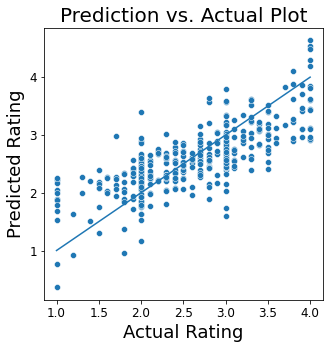

In [95]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=yf_test, y=lm_predict)
plt.xlabel('Actual Rating', fontsize=18)
plt.ylabel('Predicted Rating', fontsize=18)
plt.plot(range(1,5),range(1,5))
plt.title('Prediction vs. Actual Plot', fontsize=20);

In [96]:
list(zip(Xf.columns, lm.coef_))

[('grade_score', 0.680247337349958),
 ('route_length', -0.5734506184749657),
 ('num_pitches', 0.030277365761501765),
 ('popularity', -0.01226804309406733),
 ('log_views', 0.1833888799752086),
 ('log_desc', 0.06208659988833733),
 ('log_prot', 0.033467826906475116),
 ('routes_on_wall', -0.0781867518281412),
 ('gradeXlength', 0.21146505106394192),
 ('Cathedral Domai…', 0.009675179559604029),
 ('Hole in the Wall', -0.03615010363064343),
 ('Miller Fork Rec…', -0.0022900515033902127),
 ('Motherlode', -0.05609313057737049),
 ('Muir Valley', -0.05282278861012426),
 ('Zoo', -0.00558379166697699),
 ('other', -0.0012812093264289864),
 ('trad', 0.09873487712501615),
 ('pop_age', 0.0035490439393699447)]

## Interpretation of Results

The largest predictor of the average user-rating was the **difficulty rating** for the route. For every one unit increase, the user-rating (our target variable) increases by **0.680**. This indicates that the majority of climbers prefer a more challenging route. 

However, as the **length of the route** increases by one unit, the user-rating decreases by **0.573**. Climbers want a difficult, but shorter route. Intuitively I can understand why this would be the case for a better rating: people enjoy being challenged because they love the feeling of victory, but if the route is too long, they can get discouraged, especially on particularly difficult routes. 

As the **monthly views** increase by one unit we see an increase in the average user-rating of **0.183**. When people are searching for rock climbing routes, they may be filter the results for routes with higher ratings.